In [1]:
import keras

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
import skimage

In [5]:
from skimage import io
io.imread()

<img src="https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196&zoom=2"/>

<img src ="../CNN_Static.png"/>

In [5]:
import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
DATA_PATH = "../data/dog_cat_small_data/"
big_image = []
big_label = []
for image in os.listdir(DATA_PATH):
    if image.startswith("dog"):
        big_label.append(1)
    else:
        big_label.append(0)
    image = cv2.imread(DATA_PATH + image)
    image = cv2.resize(image, (150, 150))
    big_image.append(image)

In [6]:
big_image = np.array(big_image)
big_label = np.array(big_label)

In [7]:
big_image.shape

(200, 150, 150, 3)

In [8]:
big_image = big_image/255.0

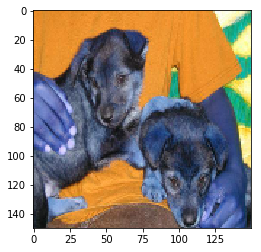

In [9]:
plt.imshow(big_image[100])

In [10]:
big_label = keras.utils.to_categorical(big_label)

In [11]:
big_label[100]

array([0., 1.], dtype=float32)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD

In [14]:
model = Sequential()
model.add(Conv2D(16, (2,2), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(8, (2,2), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [15]:
model.compile(optimizer=SGD(), loss=categorical_crossentropy, metrics=["accuracy"])

In [17]:
model.fit(big_image, big_label, epochs=10)

Epoch 1/10
200/200 [==============================] - 4s 19ms/step - loss: 0.8460 - acc: 0.5000
Epoch 2/10
200/200 [==============================] - 4s 20ms/step - loss: 0.6956 - acc: 0.5650
Epoch 3/10
200/200 [==============================] - 4s 20ms/step - loss: 0.6769 - acc: 0.5600
Epoch 4/10
200/200 [==============================] - 4s 19ms/step - loss: 0.6609 - acc: 0.6100
Epoch 5/10
200/200 [==============================] - 4s 20ms/step - loss: 0.6275 - acc: 0.6600
Epoch 6/10
200/200 [==============================] - 4s 22ms/step - loss: 0.6268 - acc: 0.6400
Epoch 7/10
200/200 [==============================] - 4s 19ms/step - loss: 0.6386 - acc: 0.6600
Epoch 8/10
200/200 [==============================] - 4s 19ms/step - loss: 0.6098 - acc: 0.6600
Epoch 9/10
200/200 [==============================] - 4s 20ms/step - loss: 0.6127 - acc: 0.6950
Epoch 10/10
200/200 [==============================] - 4s 21ms/step - loss: 0.6030 - acc: 0.6600
